<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Uttar%20Pradesh/BSP_UttarPradesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [168]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"BSP UP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('BSP_UttarPradesh.csv',index = False)

2020-11-21 23:53:27
1330298310930944003
False
The making of the BSP Wyandotte st Christmas 🎄 
Stay tuned for team up with local organizations!!!❤🍕❤

#helpeachother 
#operationbreakthrough 
#upliftorganization 
#veterancommunityproject
#spreadlove https://t.co/m5hjumuUbY
BuffalostateXR
1815 Wyandotte st Kansas City,
Instagram
0
33
47
0
<--------------------------------------------------->
1
2020-11-21 23:36:33
1330294057571115011
False
@antraqen @SaketGokhale @PriyankKharge If you see the recent Up elections , clearly the divide between sp and bsp has given them the winning edge .
LAtmanirbhar

Twitter for iPhone
0
1
20
0
<--------------------------------------------------->
2
2020-11-21 23:11:22
1330287717909934082
False
@bsp_13 Josh McDaniels : we’re on our own 42, It’s 3rd and 9 let’s get Sony the ball for a dive up the middle and get better field position for the upcoming punt  
Me: https://t.co/lMmuBuDY7y
SouthCoastJR
Massachusetts, USA
Twitter for iPhone
1
14
252
0
<--------------

In [169]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       240 non-null    datetime64[ns]
 1   Tweet_id   240 non-null    int64         
 2   Verified   240 non-null    bool          
 3   Tweet      240 non-null    object        
 4   User       240 non-null    object        
 5   Location   240 non-null    object        
 6   Source     240 non-null    object        
 7   Likes      240 non-null    int64         
 8   Followers  240 non-null    int64         
 9   Following  240 non-null    int64         
 10  Retweets   240 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 19.1+ KB


In [171]:
df.shape

(240, 11)

In [172]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [173]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [177]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [178]:
df['Source'].value_counts()

Twitter for iPhone        85
Twitter for Android       63
Twitter Web App           62
TweetDeck                 10
Hootsuite Inc.             4
cmssocialservice           2
SocialFlow                 2
Instagram                  1
Hocalwire Social Share     1
National Herald            1
IFTTT                      1
dlvr.it                    1
Twidere for Android        1
Devdiscourse News Desk     1
ht-twitter-handler         1
Echobox                    1
Twitter for iPad           1
Coosto                     1
HtLucknowApplication       1
Name: Source, dtype: int64

In [179]:
df['Location'].nunique()

101

In [180]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

240

In [181]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


235

In [182]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [183]:
df['Tweet'].duplicated().sum()

5

In [184]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(235, 11)

In [185]:
df['Tweet'].duplicated().sum()

0

In [186]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [187]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [188]:
df.shape

(235, 12)

In [189]:
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas  ...
1      @antraqen @SaketGokhale @PriyankKharge If you ...
2      @bsp_13 Josh McDaniels : we’re on our own 42, ...
3      @bsp_13 I do wonder how he was supposedly so g...
4      @bsp_13 A sign and trade doesn’t add up. He be...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231    @Sanjeev_Inamdar @osan_adil There are 3 major ...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234    @AasReports @TCNLive @asadowaisi Secular parti...
Name: Processed_Tweet, Length: 235, dtype: object

In [190]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas  ...
1      @antraqen @SaketGokhale @PriyankKharge If you ...
2      @bsp_13 Josh McDaniels : we’re on our own 42, ...
3      @bsp_13 I do wonder how he was supposedly so g...
4      @bsp_13 A sign and trade doesn’t add up. He be...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231    @Sanjeev_Inamdar @osan_adil There are 3 major ...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234    @AasReports @TCNLive @asadowaisi Secular parti...
Name: Processed_Tweet, Length: 235, dtype: object

In [191]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas  ...
1            If you see the recent Up elections , cle...
2        Josh McDaniels : we’re on our own 42, It’s 3...
3        I do wonder how he was supposedly so good le...
4        A sign and trade doesn’t add up. He became a...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231        There are 3 major players in UP - SP, BSP,...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234          Secular parties are so shameless instead...
Name: Processed_Tweet, Length: 235, dtype: object

In [192]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas  ...
1            If you see the recent Up elections , cle...
2        Josh McDaniels : we’re on our own 42, It’s 3...
3        I do wonder how he was supposedly so good le...
4        A sign and trade doesn’t add up. He became a...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231        There are 3 major players in UP - SP, BSP,...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234          Secular parties are so shameless instead...
Name: Processed_Tweet, Length: 235, dtype: object

In [193]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas  ...
1            If you see the recent Up elections , cle...
2        Josh McDaniels : we’re on our own 42, It’s 3...
3        I do wonder how he was supposedly so good le...
4        A sign and trade doesn’t add up. He became a...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231        There are 3 major players in UP - SP, BSP,...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234          Secular parties are so shameless instead...
Name: Processed_Tweet, Length: 235, dtype: object

In [194]:
!pip install tweet-preprocessor

In [195]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      The making of the BSP Wyandotte st Christmas S...
1      If you see the recent Up elections , clearly t...
2      Josh McDaniels : were on our own , Its rd and ...
3      I do wonder how he was supposedly so good lead...
4      A sign and trade doesnt add up. He became a fr...
                             ...                        
230    Mayawati names new UP BSP chief, signals strat...
231    There are major players in UP - SP, BSP, BJP. ...
232    BSP (Bhajpa Sahayak Party) appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234    Secular parties are so shameless instead of ac...
Name: Processed_Tweet, Length: 235, dtype: object

In [196]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      The making of the BSP Wyandotte st Christmas S...
1      If you see the recent Up elections   clearly t...
2      Josh McDaniels   were on our own   Its rd and ...
3      I do wonder how he was supposedly so good lead...
4      A sign and trade doesnt add up  He became a fr...
                             ...                        
230    Mayawati names new UP BSP chief  signals strat...
231    There are major players in UP   SP  BSP  BJP  ...
232    BSP  Bhajpa Sahayak Party  appoints new UP uni...
233    Secular parties are so shameless instead of ac...
234    Secular parties are so shameless instead of ac...
Name: Processed_Tweet, Length: 235, dtype: object

In [197]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      the making of the bsp wyandotte st christmas s...
1      if you see the recent up elections   clearly t...
2      josh mcdaniels   were on our own   its rd and ...
3      i do wonder how he was supposedly so good lead...
4      a sign and trade doesnt add up  he became a fr...
                             ...                        
230    mayawati names new up bsp chief  signals strat...
231    there are major players in up   sp  bsp  bjp  ...
232    bsp  bhajpa sahayak party  appoints new up uni...
233    secular parties are so shameless instead of ac...
234    secular parties are so shameless instead of ac...
Name: Processed_Tweet, Length: 235, dtype: object

In [198]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'here u come  where did i said i idolise a perticular party  why do u think muslim vote for congress  bihar they did for rjd  in up for sp or bsp  bangal tmc  telangana tcr  tamil nadu dmk or admk  ur problem is u just blindly believe what ur amit malware porno addict  forward u'

In [199]:
df['User'].value_counts()

Barney_BSP         19
bsp_13              8
CincyFanJake18      4
whoreforincubus     3
swamy64             3
                   ..
sripal_chandra      1
SouthCoastJR        1
manishniranjan3     1
brysonbonus         1
kchari2             1
Name: User, Length: 191, dtype: int64

In [200]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


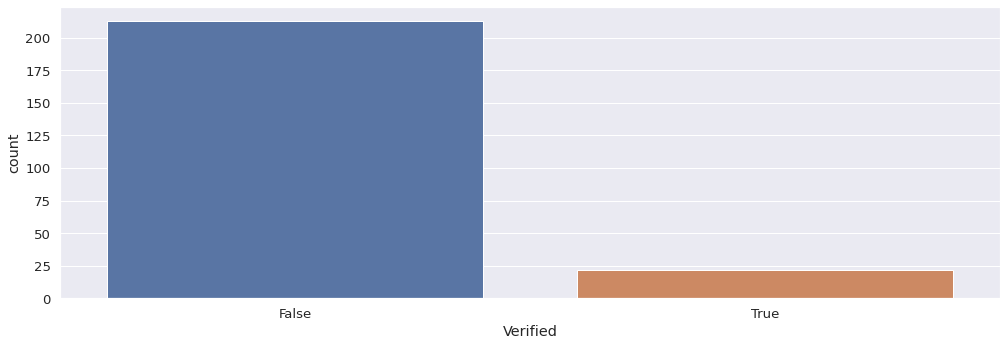

In [201]:
bar = sns.countplot(df['Verified'])

In [202]:
df['Verified'].value_counts()

False    213
True      22
Name: Verified, dtype: int64

In [203]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

ThePrintIndia      2
the_hindu          2
TOILucknow         1
HindustanTimes     1
CNNnews18          1
RohanV             1
ING_Economics      1
AmanKayamHai_ET    1
indiatvnews        1
Skyscanner         1
OptimumHelp        1
Outlookindia       1
digvijaysinghd9    1
NH_India           1
news18dotcom       1
TOICitiesNews      1
cnnphilippines     1
PhilippineStar     1
LogicalIndians     1
inquirerdotnet     1
Name: User, dtype: int64

In [204]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 22, 16: 57, 17: 29, 18: 24, 19: 40, 20: 41, 21: 22})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

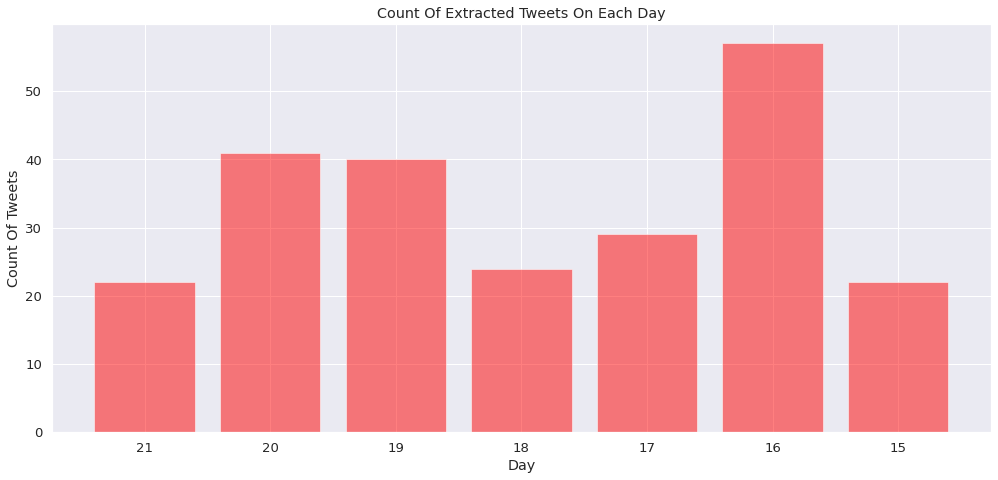

In [205]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [206]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 12,
         1: 8,
         2: 9,
         3: 10,
         4: 11,
         5: 8,
         6: 5,
         7: 5,
         8: 15,
         9: 11,
         10: 5,
         11: 9,
         12: 10,
         13: 20,
         14: 15,
         15: 19,
         16: 8,
         17: 10,
         18: 7,
         19: 6,
         20: 11,
         21: 5,
         22: 8,
         23: 8})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

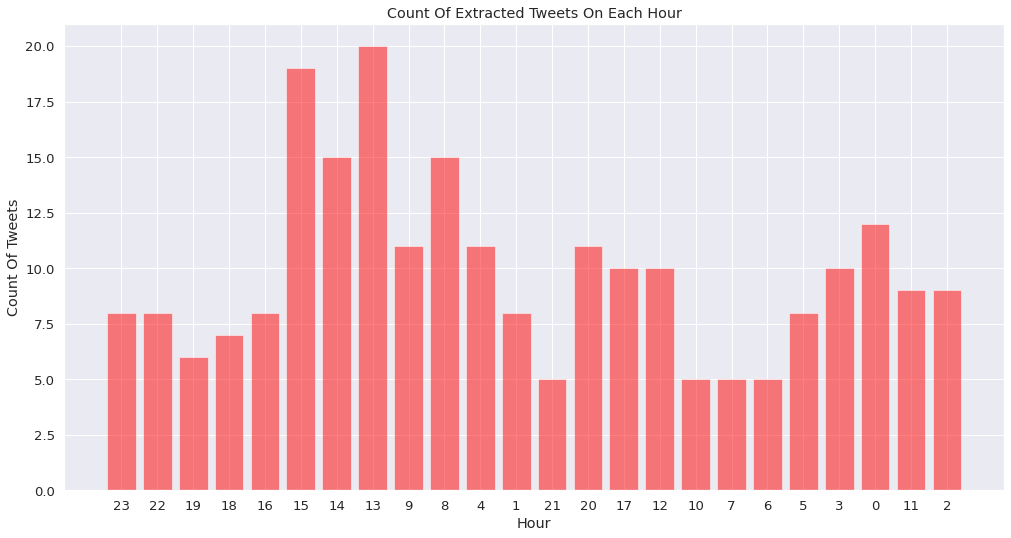

In [207]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [208]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [209]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['having', "mightn't", 'how', 'when', 'our', "doesn't", 'them', 'at', "should've", 'are', 'wasn', "don't", 'from', 'as', 'ain', 'her', 'or', 'most', 'haven', 'him', 'himself', 'out', 'am', 'more', 'against', 'the', 'while', "you'll", 'do', 'once', "couldn't", 'being', 'below', 'and', 'on', "haven't", "she's", 'be', 'few', 'their', "mustn't", 'same', 'don', 'your', 'won', "shouldn't", 'myself', 're', "isn't", 'nor', 'it', 'above', 'other', 'so', 'about', 'for', 'this', 'after', 'was', 'yours', 'yourself', 'she', 'my', 'any', 'is', "you've", 'each', 'you', 'only', 'couldn', 'ma', 'should', 'to', 'doesn', 'll', 'has', 'he', 'herself', 'they', 'because', 'down', 'its', 'will', 'those', 'of', 'can', 'an', 'yourselves', 'these', 'with', 'through', "you're", "didn't", 'were', 'hadn', 'during', 'aren', "shan't", 'then', 'mightn', "wouldn't", 'again', 'further', 'isn', "needn't", 'both', 'such', "won't", 'hers', 'y', 'did', "that'll", 'mustn', 'by', 'shouldn', 'have', 'no', 'not', 'me', 'needn'

In [211]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      making bsp wyandotte st christmas stay tuned t...
1      see recent elections clearly divide sp bsp giv...
2      josh mcdaniels rd lets get sony ball dive midd...
3          wonder supposedly good leading season nothing
4      sign trade doesnt add became free agent declin...
                             ...                        
230    mayawati names new bsp chief signals strategy ...
231         major players sp bsp bjp inc might bag seats
232    bsp bhajpa sahayak party appoints new unit chi...
233    secular parties shameless instead accepting to...
234    secular parties shameless instead accepting to...
Name: Processed_Tweet, Length: 235, dtype: object

In [212]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [making, bsp, wyandotte, st, christmas, stay, ...
1      [see, recent, elections, clearly, divide, sp, ...
2      [josh, mcdaniels, rd, lets, get, sony, ball, d...
3      [wonder, supposedly, good, leading, season, no...
4      [sign, trade, doesnt, add, became, free, agent...
                             ...                        
230    [mayawati, names, new, bsp, chief, signals, st...
231    [major, players, sp, bsp, bjp, inc, might, bag...
232    [bsp, bhajpa, sahayak, party, appoints, new, u...
233    [secular, parties, shameless, instead, accepti...
234    [secular, parties, shameless, instead, accepti...
Name: Processed_Tweet, Length: 235, dtype: object

In [213]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [make, bsp, wyandott, st, christma, stay, tune...
1      [see, recent, elect, clearli, divid, sp, bsp, ...
2      [josh, mcdaniel, rd, let, get, soni, ball, div...
3         [wonder, supposedli, good, lead, season, noth]
4      [sign, trade, doesnt, add, becam, free, agent,...
                             ...                        
230    [mayawati, name, new, bsp, chief, signal, stra...
231    [major, player, sp, bsp, bjp, inc, might, bag,...
232    [bsp, bhajpa, sahayak, parti, appoint, new, un...
233    [secular, parti, shameless, instead, accept, t...
234    [secular, parti, shameless, instead, accept, t...
Name: Processed_Tweet, Length: 235, dtype: object

In [214]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:53:27,1330298310930944003,False,The making of the BSP Wyandotte st Christmas 🎄...,BuffalostateXR,"1815 Wyandotte st Kansas City,",Instagram,0,33,47,0,"[make, bsp, wyandott, christma, stay, tune, te..."
1,2020-11-21 23:36:33,1330294057571115011,False,@antraqen @SaketGokhale @PriyankKharge If you ...,LAtmanirbhar,,Twitter for iPhone,0,1,20,0,"[see, recent, elect, clearli, divid, bsp, give..."
2,2020-11-21 23:11:22,1330287717909934082,False,"@bsp_13 Josh McDaniels : we’re on our own 42, ...",SouthCoastJR,"Massachusetts, USA",Twitter for iPhone,1,14,252,0,"[josh, mcdaniel, let, get, soni, ball, dive, m..."
3,2020-11-21 22:05:03,1330271031018352642,False,@bsp_13 I do wonder how he was supposedly so g...,Soxfan893,,Twitter for Android,0,67,523,0,"[wonder, supposedli, good, lead, season, noth]"
4,2020-11-21 19:45:52,1330236003739709441,False,@bsp_13 A sign and trade doesn’t add up. He be...,CoachMetzHoops,,Twitter Web App,0,30,151,0,"[sign, trade, doesnt, add, becam, free, agent,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
230,2020-11-15 13:54:36,1327973275817820160,False,"Mayawati names new UP BSP chief, signals strat...",htlucknow,,TweetDeck,34,653,0,4,"[mayawati, name, new, bsp, chief, signal, stra..."
231,2020-11-15 13:45:20,1327970944476872706,False,@Sanjeev_Inamdar @osan_adil There are 3 major ...,MalabarHornbill,"Delhi, India",Twitter for Android,0,8423,5800,0,"[major, player, bsp, bjp, inc, might, bag, seat]"
232,2020-11-15 13:39:55,1327969580497530881,False,BSP (Bhajpa Sahayak Party) appoints new UP uni...,INCPrajjal,New Delhi - Kolkata,Twitter for Android,0,1379,1417,0,"[bsp, bhajpa, sahayak, parti, appoint, new, un..."
233,2020-11-15 12:42:04,1327955022169010177,False,Secular parties are so shameless instead of ac...,rubusmubu,Dunia,Twitter for iPhone,14,12097,1921,3,"[secular, parti, shameless, instead, accept, t..."


In [216]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3591

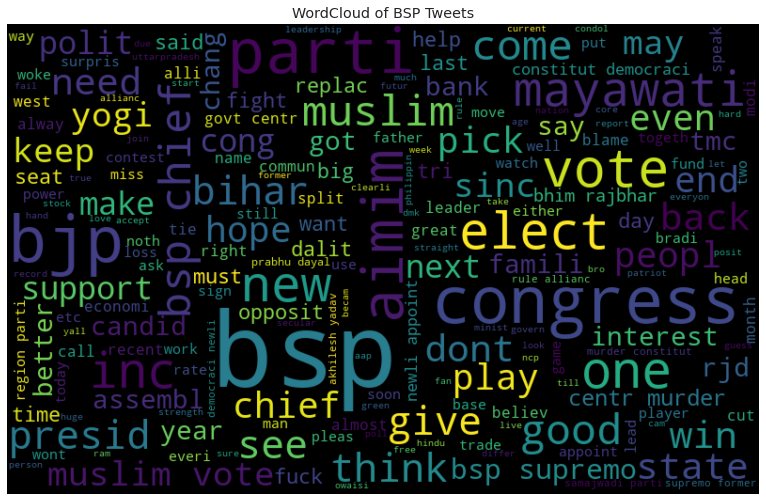

In [218]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BSP Tweets")
plt.show()

In [219]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

235

In [220]:
len(text)

3591

In [221]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 97
Negative Tweets: 39
Neutral Tweets 99


In [222]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [223]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [224]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.678,0.322,0.5859
2,0.000,0.818,0.182,0.4404
3,0.000,0.633,0.367,0.4404
4,0.212,0.788,0.000,-0.5109
...,...,...,...,...
230,0.000,1.000,0.000,0.0000
231,0.000,1.000,0.000,0.0000
232,0.000,1.000,0.000,0.0000
233,0.166,0.657,0.176,0.0772


In [225]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.678,0.322,0.5859,Positive
2,0.000,0.818,0.182,0.4404,Positive
3,0.000,0.633,0.367,0.4404,Positive
4,0.212,0.788,0.000,-0.5109,Negative


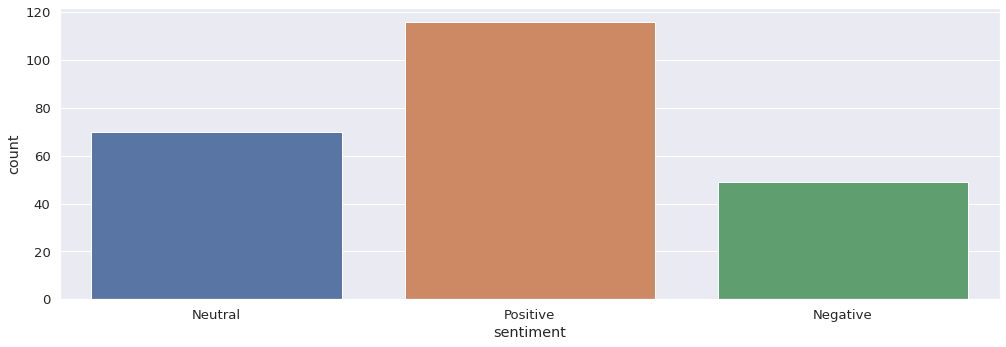

In [226]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [227]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Uttar Pradesh/BSP_UttarPradesh.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

328

In [228]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [229]:
word_emotion=dict()
for i in range(0,328):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [230]:
from numpy import nan
nan == nan


False

In [231]:
for i in range(0,235):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [232]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

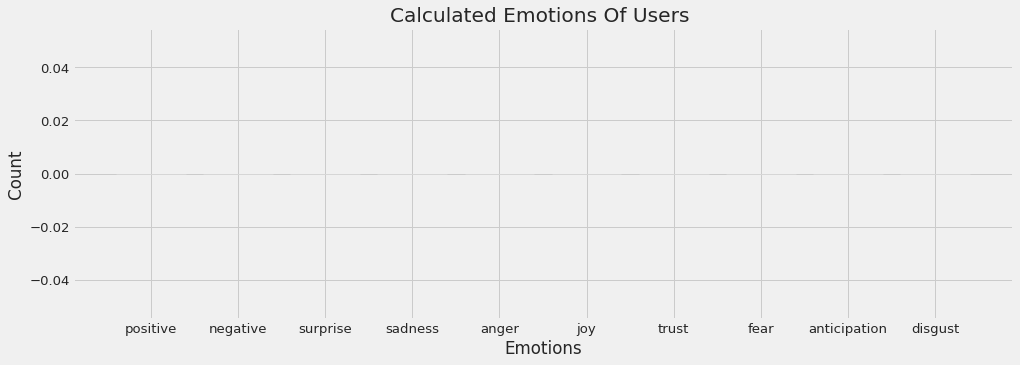

In [233]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [234]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [235]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                  64
Rents Due                         19
New Delhi, India                  13
India                             12
Boston, MA                         9
                                  ..
Los Angeles, CA                    1
Lucknow                            1
Leeds                              1
G/F UNIT 5 Aseana powerstaion      1
Vasudhaiva Kutumbakam              1
Name: Location, Length: 99, dtype: int64

In [236]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:53:27,1330298310930944003,False,The making of the BSP Wyandotte st Christmas 🎄...,BuffalostateXR,"1815 Wyandotte st Kansas City,",Instagram,0,33,47,0,"[make, bsp, wyandott, christma, stay, tune, te...",1815 Wyandotte st Kansas City
1,2020-11-21 23:36:33,1330294057571115011,False,@antraqen @SaketGokhale @PriyankKharge If you ...,LAtmanirbhar,,Twitter for iPhone,0,1,20,0,"[see, recent, elect, clearli, divid, bsp, give...",
2,2020-11-21 23:11:22,1330287717909934082,False,"@bsp_13 Josh McDaniels : we’re on our own 42, ...",SouthCoastJR,"Massachusetts, USA",Twitter for iPhone,1,14,252,0,"[josh, mcdaniel, let, get, soni, ball, dive, m...",Massachusetts
3,2020-11-21 22:05:03,1330271031018352642,False,@bsp_13 I do wonder how he was supposedly so g...,Soxfan893,,Twitter for Android,0,67,523,0,"[wonder, supposedli, good, lead, season, noth]",
4,2020-11-21 19:45:52,1330236003739709441,False,@bsp_13 A sign and trade doesn’t add up. He be...,CoachMetzHoops,,Twitter Web App,0,30,151,0,"[sign, trade, doesnt, add, becam, free, agent,...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2020-11-15 13:54:36,1327973275817820160,False,"Mayawati names new UP BSP chief, signals strat...",htlucknow,,TweetDeck,34,653,0,4,"[mayawati, name, new, bsp, chief, signal, stra...",
231,2020-11-15 13:45:20,1327970944476872706,False,@Sanjeev_Inamdar @osan_adil There are 3 major ...,MalabarHornbill,"Delhi, India",Twitter for Android,0,8423,5800,0,"[major, player, bsp, bjp, inc, might, bag, seat]",Delhi
232,2020-11-15 13:39:55,1327969580497530881,False,BSP (Bhajpa Sahayak Party) appoints new UP uni...,INCPrajjal,New Delhi - Kolkata,Twitter for Android,0,1379,1417,0,"[bsp, bhajpa, sahayak, parti, appoint, new, un...",New Delhi - Kolkata
233,2020-11-15 12:42:04,1327955022169010177,False,Secular parties are so shameless instead of ac...,rubusmubu,Dunia,Twitter for iPhone,14,12097,1921,3,"[secular, parti, shameless, instead, accept, t...",Dunia


In [237]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [238]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:53:27,1330298310930944003,False,The making of the BSP Wyandotte st Christmas 🎄...,BuffalostateXR,"1815 Wyandotte st Kansas City,",Instagram,0,33,47,0,"[make, bsp, wyandott, christma, stay, tune, te...",1815 Wyandotte st Kansas City,Neutral,21
1,2020-11-21 23:36:33,1330294057571115011,False,@antraqen @SaketGokhale @PriyankKharge If you ...,LAtmanirbhar,,Twitter for iPhone,0,1,20,0,"[see, recent, elect, clearli, divid, bsp, give...",,Positive,21
2,2020-11-21 23:11:22,1330287717909934082,False,"@bsp_13 Josh McDaniels : we’re on our own 42, ...",SouthCoastJR,"Massachusetts, USA",Twitter for iPhone,1,14,252,0,"[josh, mcdaniel, let, get, soni, ball, dive, m...",Massachusetts,Positive,21
3,2020-11-21 22:05:03,1330271031018352642,False,@bsp_13 I do wonder how he was supposedly so g...,Soxfan893,,Twitter for Android,0,67,523,0,"[wonder, supposedli, good, lead, season, noth]",,Positive,21
4,2020-11-21 19:45:52,1330236003739709441,False,@bsp_13 A sign and trade doesn’t add up. He be...,CoachMetzHoops,,Twitter Web App,0,30,151,0,"[sign, trade, doesnt, add, becam, free, agent,...",,Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


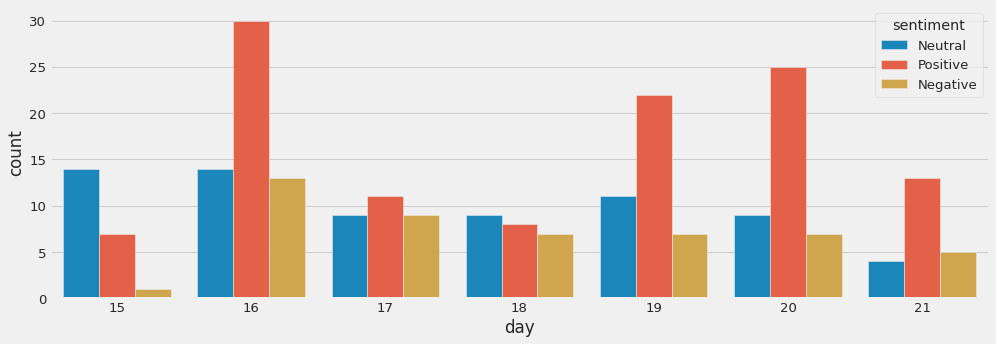

In [240]:
sns.countplot(df['day'],hue = df['sentiment'])

In [241]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [242]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:53:27,1330298310930944003,False,The making of the BSP Wyandotte st Christmas 🎄...,BuffalostateXR,"1815 Wyandotte st Kansas City,",Instagram,0,33,47,0,"[make, bsp, wyandott, christma, stay, tune, te...",1815 Wyandotte st Kansas City,Neutral,21,1
1,2020-11-21 23:36:33,1330294057571115011,False,@antraqen @SaketGokhale @PriyankKharge If you ...,LAtmanirbhar,,Twitter for iPhone,0,1,20,0,"[see, recent, elect, clearli, divid, bsp, give...",,Positive,21,2
2,2020-11-21 23:11:22,1330287717909934082,False,"@bsp_13 Josh McDaniels : we’re on our own 42, ...",SouthCoastJR,"Massachusetts, USA",Twitter for iPhone,1,14,252,0,"[josh, mcdaniel, let, get, soni, ball, dive, m...",Massachusetts,Positive,21,2
3,2020-11-21 22:05:03,1330271031018352642,False,@bsp_13 I do wonder how he was supposedly so g...,Soxfan893,,Twitter for Android,0,67,523,0,"[wonder, supposedli, good, lead, season, noth]",,Positive,21,2
4,2020-11-21 19:45:52,1330236003739709441,False,@bsp_13 A sign and trade doesn’t add up. He be...,CoachMetzHoops,,Twitter Web App,0,30,151,0,"[sign, trade, doesnt, add, becam, free, agent,...",,Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2020-11-15 13:54:36,1327973275817820160,False,"Mayawati names new UP BSP chief, signals strat...",htlucknow,,TweetDeck,34,653,0,4,"[mayawati, name, new, bsp, chief, signal, stra...",,Neutral,15,1
231,2020-11-15 13:45:20,1327970944476872706,False,@Sanjeev_Inamdar @osan_adil There are 3 major ...,MalabarHornbill,"Delhi, India",Twitter for Android,0,8423,5800,0,"[major, player, bsp, bjp, inc, might, bag, seat]",Delhi,Neutral,15,1
232,2020-11-15 13:39:55,1327969580497530881,False,BSP (Bhajpa Sahayak Party) appoints new UP uni...,INCPrajjal,New Delhi - Kolkata,Twitter for Android,0,1379,1417,0,"[bsp, bhajpa, sahayak, parti, appoint, new, un...",New Delhi - Kolkata,Neutral,15,1
233,2020-11-15 12:42:04,1327955022169010177,False,Secular parties are so shameless instead of ac...,rubusmubu,Dunia,Twitter for iPhone,14,12097,1921,3,"[secular, parti, shameless, instead, accept, t...",Dunia,Positive,15,2


In [243]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [245]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [246]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [247]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.5915492957746479
Precision Score:  0.5915492957746479
Recall Score:  0.5915492957746479
F1 Score:  0.5915492957746479


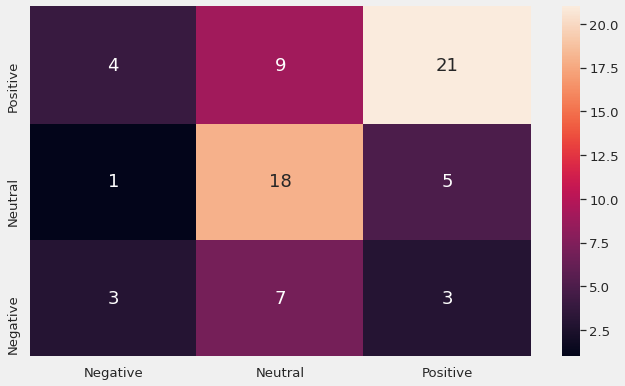

In [248]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [249]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [250]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [253]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5551470588235294
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [255]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.5070422535211268
Precision Score:  0.5070422535211268
Recall Score:  0.5070422535211268
F1 Score:  0.5070422535211268


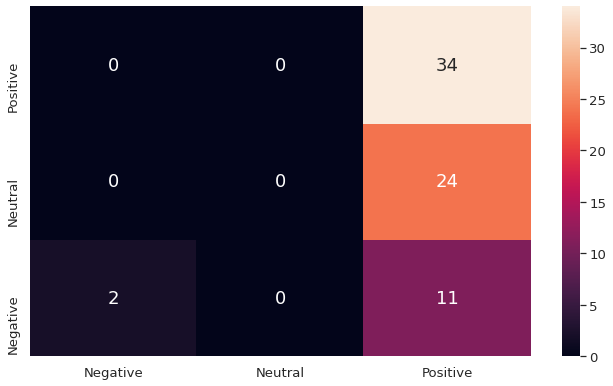

In [256]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [257]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [258]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6056338028169014
Precision Score:  0.6056338028169014
Recall Score:  0.6056338028169014
F1 Score:  0.6056338028169014


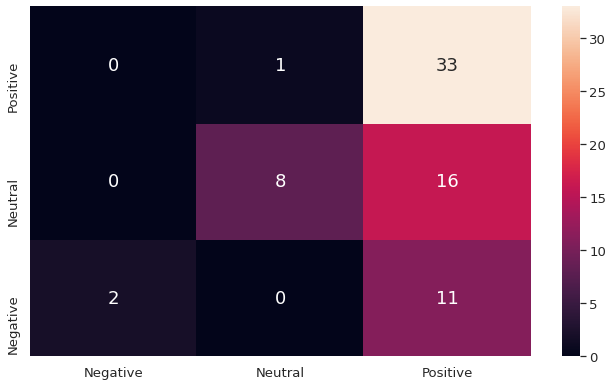

In [259]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [260]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [261]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=11, criterion=entropy ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=11, criterion=entropy, score=0.515, total=   0.6s
[CV] n_estimators=400, max_depth=11, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=11, criterion=entropy, score=0.515, total=   0.6s
[CV] n_estimators=400, max_depth=11, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=400, max_depth=11, criterion=entropy, score=0.515, total=   0.6s
[CV] n_estimators=400, max_depth=11, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=400, max_depth=11, criterion=entropy, score=0.515, total=   0.6s
[CV] n_estimators=400, max_depth=11, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=400, max_depth=11, criterion=entropy, score=0.625, total=   0.6s
[CV] n_estimators=1000, max_depth=17, criterion=gini .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=17, criterion=gini, score=0.545, total=   1.6s
[CV] n_estimators=1000, max_depth=17, criterion=gini .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=17, criterion=gini, score=0.515, total=   1.6s
[CV] n_estimators=1000, max_depth=17, criterion=gini .................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=17, criterion=gini, score=0.545, total=   1.6s
[CV] n_estimators=1000, max_depth=17, criterion=gini .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=17, criterion=gini, score=0.515, total=   1.6s
[CV] n_estimators=1000, max_depth=17, criterion=gini .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=17, criterion=gini, score=0.625, total=   1.6s
[CV] n_estimators=600, max_depth=1, criterion=gini ...................
[CV]  n_estimators=600, max_depth=1, criterion=gini, score=0.515, total=   0.8s
[CV] n_estimators=600, max_depth=1, criterion=gini ...................
[CV]  n_estimators=600, max_depth=1, criterion=gini, score=0.515, total=   0.8s
[CV] n_estimators=600, max_depth=1, criterion=gini ...................
[CV]  n_estimators=600, max_depth=1, criterion=gini, score=0.485, total=   0.8s
[CV] n_estimators=600, max_depth=1, criterion=gini ...................
[CV]  n_estimators=600, max_depth=1, criterion=gini, score=0.485, total=   0.8s
[CV] n_estimators=600, max_depth=1, criterion=gini ...................
[CV]  n_estimators=600, max_depth=1, criterion=gini, score=0.500, total=   0.8s
[CV] n_estimators=700, max_depth=19, criterion=gini ..................
[CV]  n_estimators=700, max_depth=19, criterion=gini, score=0.545, total=   1.1s
[CV] n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.4s finished


0.5553030303030303
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [262]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5352112676056338
Precision Score:  0.5352112676056338
Recall Score:  0.5352112676056338
F1 Score:  0.5352112676056338


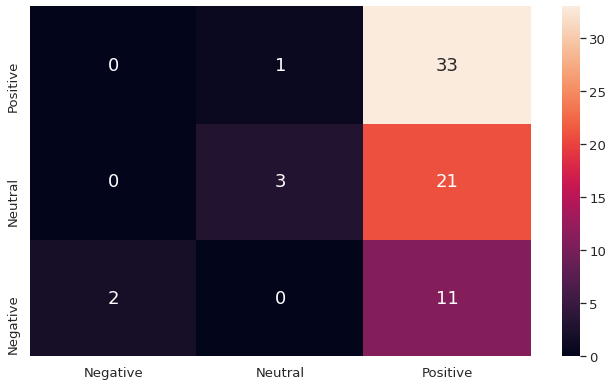

In [263]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [264]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6056338028169014
Precision Score:  0.6056338028169014
Recall Score:  0.6056338028169014
F1 Score:  0.6056338028169014


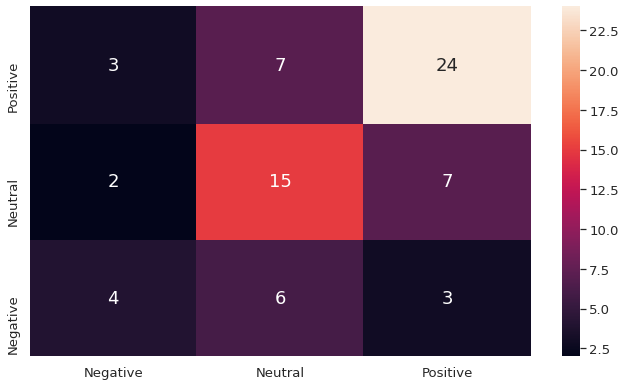

In [265]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [266]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [267]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6352941176470588
{'alpha': 3, 'class_prior': None, 'fit_prior': True}


In [268]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.5915492957746479
Precision Score:  0.5915492957746479
Recall Score:  0.5915492957746479
F1 Score:  0.5915492957746479


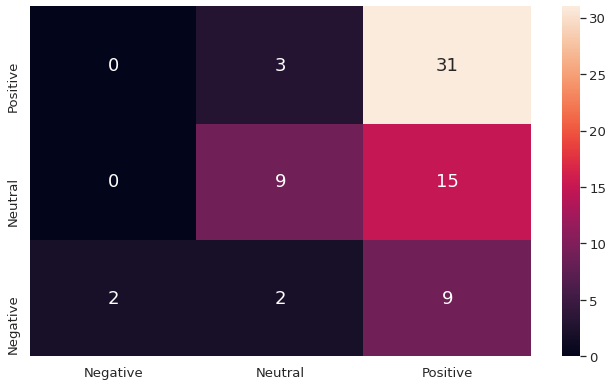

In [269]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

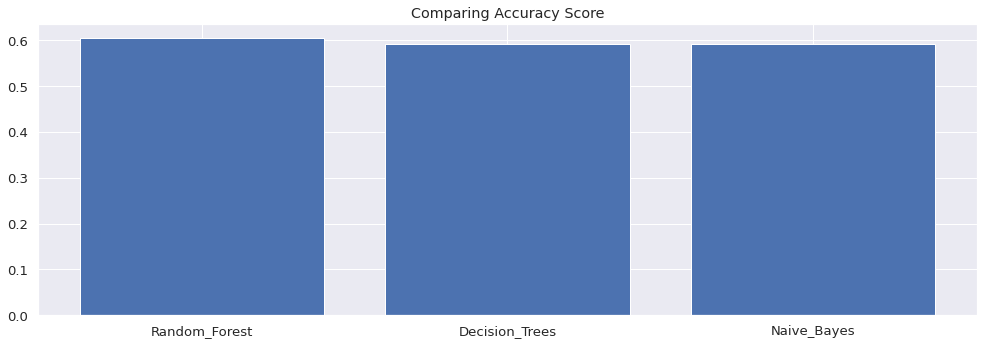

In [270]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

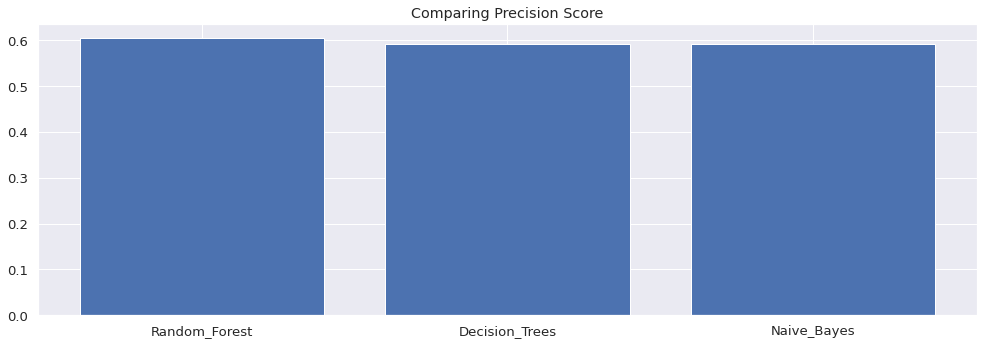

In [271]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

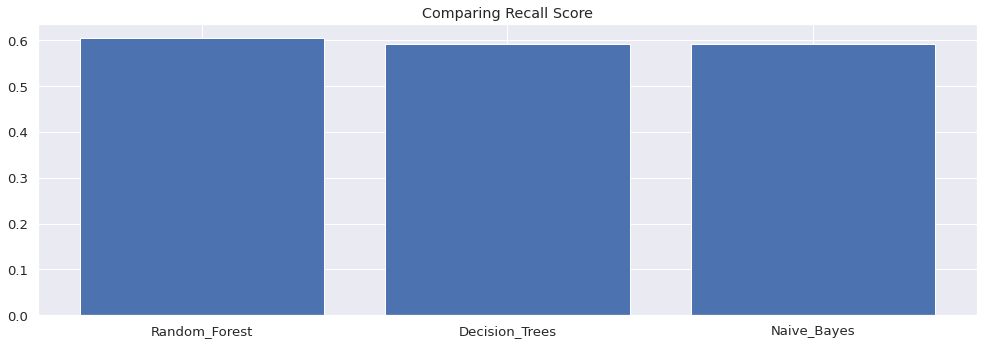

In [272]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

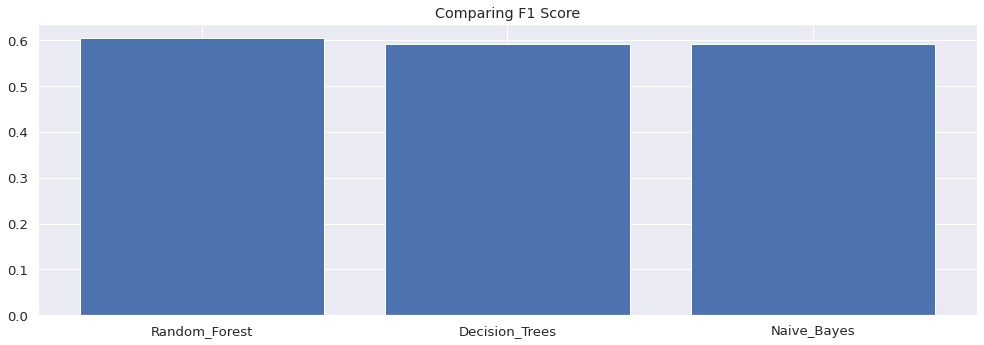

In [273]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()